# Algoritmo del vecino más cercano

Es un modelo muy popular de regresión utilizado cuando la variable a predecir (dependiente) es cualitativa (es decir númerica discreta, o nóminal); basada en la probabilidad de que un evento ocurra a partir de las variables independientes las cuales pueden ser categoricas o númericas (la importancia) de las variables independientes.

En el siguiente fragmento de código encontraremos como instalar la dependencia **sklearn** la cual contiene la implementación de los algoritmos clásicos de ML incluyendo el algoritmo del Vecino mas Cercano; si quieres conocer a mayor detalle la implementación de la misma puedes entrar a la documentación de ella <a href="https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html">aquí</a>

In [1]:
!pip install sklearn

Ahora vamos a agregar la librería que contiene el modelo de Naive Bayes y la librería datetime, puesto que vamos a crear una función **linear_discriminant_algorithm** que recibe como parametro las variables **iterations, train_data, x_variables, y_variable** que hacen referencia la cantidad máxima de iteraciones para la convergencia del modelo, el conjunto de datos de entrenamiento, los nombres de las columnas asociadas a las variables independientes y la variable dependiente (razón de ser de la predicción) respectivamente; la cual debe retornar el modelo entrenado y el tiempo en milisegundos que tomo dicho entrenamiento.

In [1]:
# https://www.datacamp.com/community/tutorials/k-means-clustering-python

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [3]:
print("***** Train_Set *****")
print(train.head())
print("\n")
print("***** Test_Set *****")
print(test.head())

***** Train_Set *****
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.05

In [4]:
print("***** Train_Set *****")
print(train.describe())
print("\n")
print("***** Test_Set *****")
print(test.describe())

***** Train_Set *****
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


***** Test_Set *****
       PassengerId      Pclass      

In [5]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train.isna().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [7]:
test.isna().head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False


In [8]:
print("*****In the train set*****")
print(train.isna().sum())
print("\n")
print("*****In the test set*****")
print(test.isna().sum())

*****In the train set*****
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


*****In the test set*****
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
# Fill missing values with mean column values in the train set
train.fillna(train.mean(), inplace=True)

In [10]:
# Fill missing values with mean column values in the test set
test.fillna(test.mean(), inplace=True)

In [11]:
print(train.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [12]:
print(test.isna().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [13]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [15]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


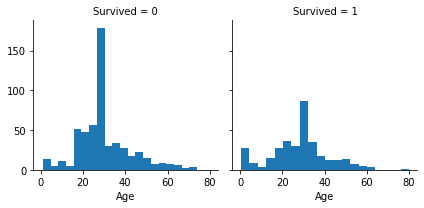

In [18]:
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

c:\users\usuario\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


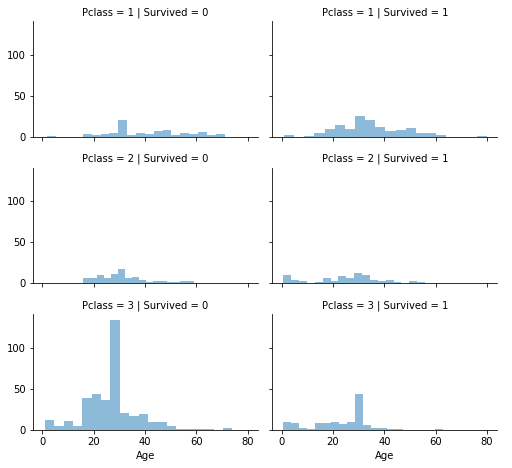

In [19]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

KeyError: "['Name' 'Ticket' 'Cabin' 'Embarked'] not found in axis"

In [23]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [26]:
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])
print('Train X variables')
print(X)
print('Train Y variables')
print(y)
print('Train dataset info')
print(train.info())

Train X variables
[[  1.       3.       1.     ...   1.       0.       7.25  ]
 [  2.       1.       0.     ...   1.       0.      71.2833]
 [  3.       3.       0.     ...   0.       0.       7.925 ]
 ...
 [889.       3.       0.     ...   1.       2.      23.45  ]
 [890.       1.       1.     ...   0.       0.      30.    ]
 [891.       3.       1.     ...   0.       0.       7.75  ]]
Train Y variables
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 

In [52]:
kmeans = KMeans(n_clusters=2, max_iter=600, algorithm = 'auto')
kmeans.fit(X)

KMeans(max_iter=600, n_clusters=2)

En los siguientes fragmentos de código se procede rápidamente con la carga, preparación y análisis exploratorio de los datos correspondientes a <a href="https://archive.ics.uci.edu/ml/datasets/zoo" target="_blank">Zoo Data Set</a>; para mas información sobre el detalle y paso a paso de los procedimientos realizados puedes dirigirte a la sección de <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/PreparacionDatos.ipynb" target="_blank">Preparación de los datos</a> y  <a href="https://colab.research.google.com/github/raulhabits/prueba-pasantia/blob/main/AnalisisExploratorio.ipynb" target="_blank">Ánalisis exploratorio</a>

**Nota.** Es importante recordar los pasos para el procesamiento de datos. Esto aplica para absolutamente todos los métodos que quisieramos utilizar.
* Obtención de los datos
* Preparación de los datos
* Definición del conjunto de datos de entrenamiento (con el que se va a construir el modelo)
* Definición del conjunto de datos de prueba (con el que se validara la confianza del modelo)
* Selección del algoritmo con el que se construye el modelo
* Entrenamiento del modelo
* Validacion del modelo (esto incluye revisar los resultados de la ejecución del modelo con los datos de prueba y la toma de medidas para establecer la confianza del modelo)

Con el siguiente fragmento de código vamos a proceder con el llamado a la funcion **knn_algorithm** definida previamente en esta guía, pasando como parametros:
1. El número máximo de iteraciones para que el algoritmo de regresión logística
2. El conjunto de datos de entrenamiento
3. Las los atributos asociados a las variables independientes que se usaran para el entrenamiento del modelo
4. La el nombre del atributo asociado a la variable dependiente que queremos predecir a partir de la información que pueda extraer el algorítmo de las demas variables

Ahora vamos a pasarle al modelo el conjunto de validación y así ver como son las predicciones realizadas.

Ahora vamos a validar el modelo creando la función **extract_error_measures** que recibe como parametros **expected_test_outputs, predictions** los cuales hacen referencia a los valores esperados de la predicción y los valores resultantes de la predicción del modelo respectivamente; y retorna las variables **test_mean_absolute_error, test_mean_squared_error** las cuales hacen referencia a la medida del error medio absoluto y el error cuadratico medio respectivamente. Los cuales nos ayudan a comprender la efectividad y confianza del modelo.

In [53]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def extract_error_measures(expected_test_outputs, predictions):
    test_mean_absolute_error = mean_absolute_error(expected_test_outputs, predictions)
    test_mean_squared_error = mean_squared_error(expected_test_outputs, predictions)
    return test_mean_absolute_error, test_mean_squared_error

Para efectos de presentación de resultados definiremos la variable **algorithm_scores** la cual tiene una estructura de tabla con los campos retornados en la función **extract_error_measures**, junto con el tiempo en milisegundos que tomo la construcción del modelo y la ejecución de todos los elementos de prueba.

In [54]:
import pandas as pd

algorithm_scores = pd.DataFrame(columns=['algorithm','mean_absolute_error', 'mean_squared_error', 'train_elapsed_time', 'test_elapsed_time'])

Ahora vamos a agregarle a la tabla de resultados las medidas de interés tomadas del modelo; para ello llamaremos la función **extract_error_measures**

In [55]:
predictions = kmeans.predict(X)
train_elapsed_time = 0 
test_elapsed_time = 0

test_mean_absolute_error, test_mean_squared_error = extract_error_measures(predictions, y)
algorithm_scores.loc[len(algorithm_scores)] = ['Vecino más cercano', test_mean_absolute_error, test_mean_squared_error, train_elapsed_time, test_elapsed_time]


In [56]:
algorithm_scores

,algorithm,mean_absolute_error,mean_squared_error,train_elapsed_time,test_elapsed_time
0,Vecino más cercano,0.508418,0.508418,0,0
